In [1]:
from torchvision import  datasets
from torchvision.transforms import ToTensor

In [7]:
# Importing Data
train_data = datasets.MNIST(
    root="data",
    train=True,
    transform=ToTensor(),
    download=True
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [6]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [9]:
# Data Loaders
from torch.utils.data import DataLoader

loaders={
    "train": DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    "test": DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}

In [10]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1418103a900>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x141830ec8f0>}

In [14]:
# Model Architecture

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop= nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x= F.relu(F.max_pool2d(self.conv1(x), 2))
        x= F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x= x.view(-1, 320)
        x= F.relu(self.fc1(x))
        x= F.dropout(x, training=self.training)
        x=self.fc2(x)

        return F.softmax(x)
    

In [15]:
#Training the Model

import torch

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model= CNN().to(device)

optimizer= optim.Adam(model.parameters(), lr=0.001)

loss_fn= nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target= data.to(device), target.to(device)
        optimizer.zero_grad()
        output= model(data)
        loss= loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx/ len(loaders["train"]):.0f}%)] \t{loss.item():0.6f}')


def test():
    model.eval()
    test_loss= 0
    correct= 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target= data.to(device), target.to(device)
            output= model(data)
            test_loss+= loss_fn(output, target).item()
            pred= output.argmax(dim=1, keepdim=True)
            correct+= pred.eq(target.view_as(pred)).sum().item()

    test_loss/= len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(loaders["test"].dataset)} ({100. * correct/ len(loaders["test"].dataset):.0f}%)\n')


In [16]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\ZONE\AppData\Local\Temp\ipykernel_4144\3850629177.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)] 	2.302526
Train Epoch: 1 [2000/60000 (3%)] 	2.292472
Train Epoch: 1 [4000/60000 (7%)] 	2.192063
Train Epoch: 1 [6000/60000 (10%)] 	2.002323
Train Epoch: 1 [8000/60000 (13%)] 	1.871534
Train Epoch: 1 [10000/60000 (17%)] 	1.780292
Train Epoch: 1 [12000/60000 (20%)] 	1.759990
Train Epoch: 1 [14000/60000 (23%)] 	1.795020
Train Epoch: 1 [16000/60000 (27%)] 	1.770849
Train Epoch: 1 [18000/60000 (30%)] 	1.697128
Train Epoch: 1 [20000/60000 (33%)] 	1.729069
Train Epoch: 1 [22000/60000 (37%)] 	1.712193
Train Epoch: 1 [24000/60000 (40%)] 	1.634832
Train Epoch: 1 [26000/60000 (43%)] 	1.643689
Train Epoch: 1 [28000/60000 (47%)] 	1.685393
Train Epoch: 1 [30000/60000 (50%)] 	1.677029
Train Epoch: 1 [32000/60000 (53%)] 	1.667165
Train Epoch: 1 [34000/60000 (57%)] 	1.696967
Train Epoch: 1 [36000/60000 (60%)] 	1.659959
Train Epoch: 1 [38000/60000 (63%)] 	1.675024
Train Epoch: 1 [40000/60000 (67%)] 	1.649504
Train Epoch: 1 [42000/60000 (70%)] 	1.665028
Train Epoch: 1 [44000

C:\Users\ZONE\AppData\Local\Temp\ipykernel_4144\3850629177.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 7


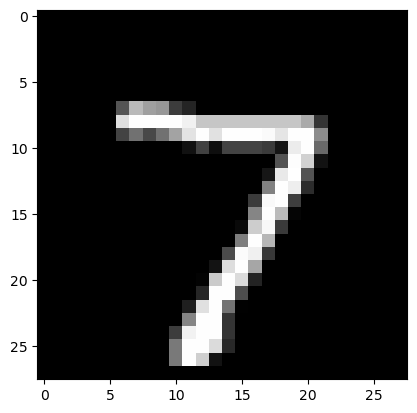

In [18]:
# Visualizing the Results

import matplotlib.pyplot as plt

model.eval()

data, target= test_data[0]

data= data.unsqueeze(0).to(device)

output= model(data)

prediction= output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image= data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()


C:\Users\ZONE\AppData\Local\Temp\ipykernel_4144\3850629177.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 2


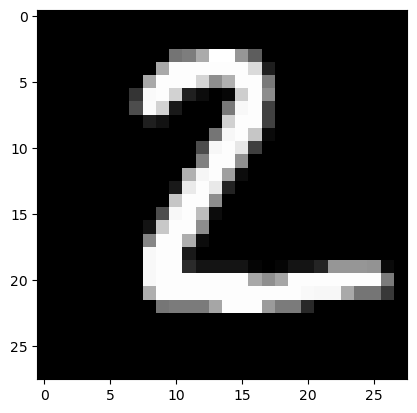

In [19]:
import matplotlib.pyplot as plt

model.eval()

data, target= test_data[1]

data= data.unsqueeze(0).to(device)

output= model(data)

prediction= output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image= data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()


C:\Users\ZONE\AppData\Local\Temp\ipykernel_4144\3850629177.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 1


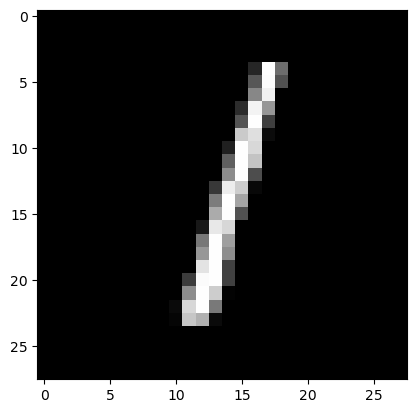

In [20]:
import matplotlib.pyplot as plt

model.eval()

data, target= test_data[2]

data= data.unsqueeze(0).to(device)

output= model(data)

prediction= output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image= data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()


C:\Users\ZONE\AppData\Local\Temp\ipykernel_4144\3850629177.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Prediction: 0


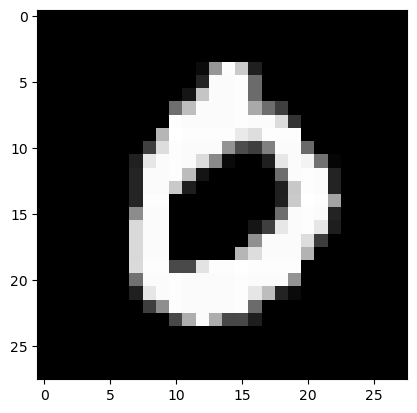

In [21]:
import matplotlib.pyplot as plt

model.eval()

data, target= test_data[3]

data= data.unsqueeze(0).to(device)

output= model(data)

prediction= output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image= data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()
